In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import SGD,Adam,Adadelta
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
path = 'D:\\fake-vs-real\\real_vs_fake\\real-vs-fake\\'

'''train_datagen = ImageDataGenerator(rescale = 1./255,
                                  zoom_range = 0.2, 
                                  shear_range = 0.2)'''

image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode = 'binary')

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [13]:
# Pamameters Initialization
input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=1024, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 56, 56, 32)       

In [14]:
model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [16]:
train_steps = 40000//batch_size
valid_steps = 5000//batch_size
history = model.fit_generator(
    train_flow,
    epochs=10,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
625/625 [==============================] - 5474s 9s/step - loss: 0.5600 - accuracy: 0.7146 - val_loss: 0.4824 - val_accuracy: 0.7684
Epoch 2/10
625/625 [==============================] - 3842s 6s/step - loss: 0.4383 - accuracy: 0.7962 - val_loss: 0.4445 - val_accuracy: 0.7899
Epoch 3/10
625/625 [==============================] - 3684s 6s/step - loss: 0.3751 - accuracy: 0.8316 - val_loss: 0.3531 - val_accuracy: 0.8427
Epoch 4/10
625/625 [==============================] - 2787s 4s/step - loss: 0.3207 - accuracy: 0.8619 - val_loss: 0.3934 - val_accuracy: 0.8257
Epoch 5/10
625/625 [==============================] - 2668s 4s/step - loss: 0.2671 - accuracy: 0.8873 - val_loss: 0.4113 - val_accuracy: 0.8135
Epoch 6/10
625/625 [==============================] - 2961s 5s/step - loss: 0.2396 - accuracy: 0.9007 - val_loss: 0.2845 - val_accuracy: 0.8792
Epoch 7/10
625/625 [==============================] - 2960s 

In [17]:
model.save("deep_fake_custom_CNN_model.h5") # save model
print("Model Saved Successfully")

Model Saved Successfully


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

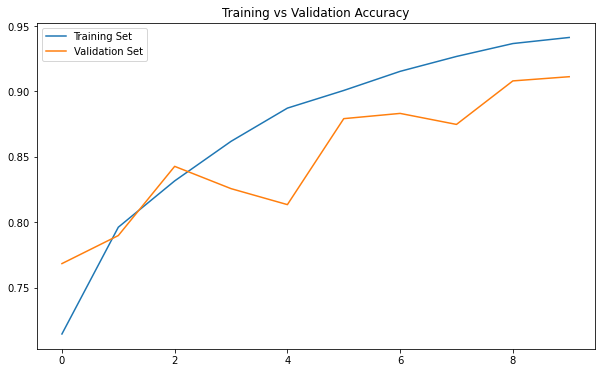

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['accuracy'], label = 'Training Set')
plt.plot(history.history['val_accuracy'], label = 'Validation Set')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

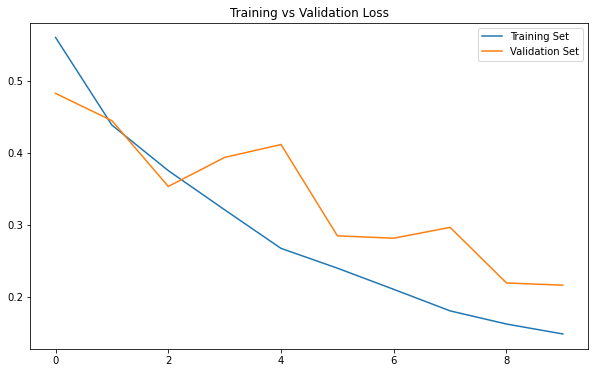

In [20]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Set')
plt.plot(history.history['val_loss'], label = 'Validation Set')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [22]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("AP Score:", average_precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.9885498899999999
AP Score: 0.9874157360683484
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     10000
           1       0.98      0.84      0.90     10000

    accuracy                           0.91     20000
   macro avg       0.92      0.91      0.91     20000
weighted avg       0.92      0.91      0.91     20000

